In [1]:
!pwd

/home/viluiz/PhD_work/ReactiveTransport/TestCase1.CationExchange/dataset_MonteCarlo_cov_500.000


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import matplotlib as mpl


In [4]:
pd.__version__

'1.4.1'

In [5]:
df = pd.read_csv('dataset_CationExchange.csv')

In [6]:
df

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.659637,1.500000,0.000000,0.702544,0.000000,0.252738,0.628619,0.599266,0.094700,0.569429,0.67250,1.5000,0.01602,0.660800,NaN
1,0.330535,0.921054,0.705436,0.000000,0.278014,0.523980,0.926168,0.000000,0.241081,0.273083,0.32860,0.9211,0.68890,0.020430,0.2780
2,0.000000,0.000000,1.044015,0.176316,1.230545,0.218625,0.312582,0.762879,0.006343,0.885093,0.04206,NaN,1.00200,0.134100,1.2310
3,0.170058,0.968571,0.618015,0.230701,0.231029,0.915215,1.500000,0.000000,0.000000,0.000000,0.19460,0.9686,0.59960,0.200000,0.2310
4,0.680368,0.958257,0.244924,0.000000,0.241052,0.370225,1.400311,0.407747,0.041630,0.000000,0.67570,0.9583,0.24990,0.004351,0.2411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.136546,0.852886,0.593733,0.319813,0.345342,0.292541,0.557344,0.554391,0.062373,0.640758,0.15910,0.8529,0.58800,0.280400,0.3453
499996,0.291718,0.666765,0.425437,0.186752,0.531464,0.107929,0.532318,0.705027,0.270262,0.665710,0.26980,0.6668,0.44240,0.213600,0.5315
499997,0.000000,0.532423,0.857172,0.446859,0.665285,0.185345,1.152612,0.337552,0.469046,0.047261,0.04393,0.5324,0.81790,0.398300,0.6653
499998,0.032918,0.679423,1.045092,0.083449,0.518703,0.501819,0.915135,0.039195,0.156089,0.283967,0.06205,0.6794,0.99260,0.077720,0.5187


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0_Ca    500000 non-null  float64
 1   0_Cl    500000 non-null  float64
 2   0_Na    500000 non-null  float64
 3   0_K     500000 non-null  float64
 4   0_N5    500000 non-null  float64
 5   1_Ca    500000 non-null  float64
 6   1_Cl    500000 non-null  float64
 7   1_Na    500000 non-null  float64
 8   1_K     500000 non-null  float64
 9   1_N5    500000 non-null  float64
 10  out_Ca  477877 non-null  float64
 11  out_Cl  471808 non-null  float64
 12  out_Na  489704 non-null  float64
 13  out_K   480137 non-null  float64
 14  out_N5  388453 non-null  float64
dtypes: float64(15)
memory usage: 57.2 MB


In [8]:
df[df.isna().any(axis=1)]

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.659637,1.500000,0.000000,0.702544,0.000000,0.252738,0.628619,0.599266,0.094700,0.569429,0.67250,1.5000,0.01602,0.66080,NaN
2,0.000000,0.000000,1.044015,0.176316,1.230545,0.218625,0.312582,0.762879,0.006343,0.885093,0.04206,NaN,1.00200,0.13410,1.2310
5,0.391996,1.343860,0.051595,0.357774,0.000000,0.238909,1.383325,0.089949,0.603019,0.000000,0.37230,1.3440,0.05287,0.39590,NaN
21,0.000000,0.745278,0.860799,0.525973,0.453514,0.000000,0.183342,0.768837,0.547032,1.013830,NaN,0.7453,0.84230,0.54450,0.4535
22,0.488620,1.293871,0.080722,0.139074,0.000000,0.199817,0.560807,0.687333,0.113872,0.637524,0.47760,1.2940,0.09966,0.14230,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499973,0.000000,0.340257,1.265573,0.366943,0.857403,0.000000,0.240516,0.841612,0.622737,0.956812,NaN,0.3403,1.14700,0.48560,0.8574
499978,0.154818,1.344306,0.244754,0.615912,0.000000,0.341391,0.720590,0.337718,0.173241,0.477086,0.18680,1.3440,0.24510,0.55150,NaN
499984,0.224794,0.000000,0.859626,0.000000,1.367602,0.164193,0.373613,0.634096,0.234858,0.823879,0.21000,NaN,0.85520,0.03403,1.3680
499986,0.602592,1.399186,0.000000,0.226424,0.000000,0.044097,1.140686,0.274671,0.802600,0.059404,0.49840,1.3990,0.01563,0.41930,NaN


In [9]:
df.describe()

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,4.778770e+05,471808.000000,4.897040e+05,480137.000000,3.884530e+05
mean,0.263375,0.802542,0.530852,0.263697,0.450522,0.262959,0.802135,0.531427,0.263731,0.450581,2.321423e-01,0.850497,5.812496e-01,0.321032,5.798924e-01
std,0.234554,0.445709,0.405246,0.230319,0.406680,0.234592,0.445059,0.404934,0.230417,0.405807,2.143033e-01,0.411997,3.734250e-01,0.223528,3.712944e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.070000e-09,0.000007,6.834000e-07,0.000001,1.513000e-07
25%,0.038222,0.466426,0.181756,0.046338,0.044319,0.037249,0.466988,0.183069,0.046708,0.046445,5.686000e-02,0.531800,2.847000e-01,0.137800,2.819000e-01
50%,0.229547,0.811477,0.498572,0.232663,0.387388,0.229035,0.811056,0.499233,0.232472,0.387824,1.711000e-01,0.847200,5.724000e-01,0.297000,5.317000e-01
75%,0.421308,1.155551,0.816106,0.419430,0.731433,0.420915,1.153466,0.816278,0.419671,0.730926,3.674000e-01,1.179000,8.488000e-01,0.465600,8.264000e-01
max,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.491000e+00,1.500000,2.053000e+00,1.666000,1.500000e+00


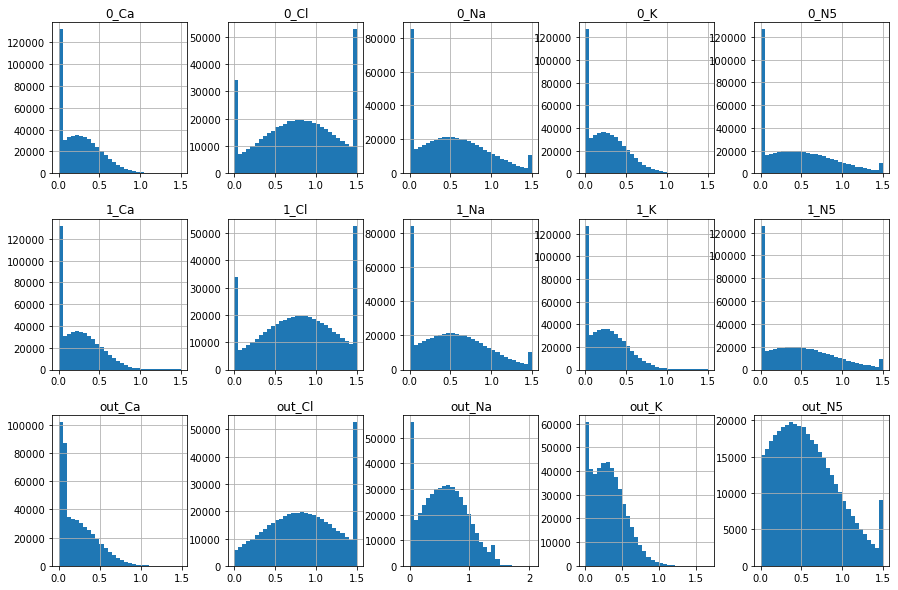

In [10]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

df.hist(alpha=1.,figsize = (15,10), layout=(3,5), bins=30);

In [11]:
df_corr_matrix = df.corr()
df_corr_matrix
df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

/tmp/ipykernel_16368/2324509408.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)


,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0_Ca,1.0000,0.5868,-0.7882,-0.5064,-0.5523,0.0001,-0.0014,0.0011,-0.0009,0.0013,0.8218,0.5582,-0.7227,-0.1732,-0.4547
0_Cl,0.5868,1.0000,-0.7935,0.0788,-0.9744,-0.0017,-0.0019,0.0028,-0.0006,0.0018,0.4767,1.0000,-0.7421,0.2007,-0.9918
0_Na,-0.7882,-0.7935,1.0000,0.0682,0.7913,0.0007,0.0024,-0.0026,0.0016,-0.0023,-0.6304,-0.7570,0.9381,-0.1342,0.7188
0_K,-0.5064,0.0788,0.0682,1.0000,-0.0763,-0.0024,-0.0008,0.0028,0.0013,0.0010,-0.3631,0.0707,0.0527,0.6960,-0.0589
0_N5,-0.5523,-0.9744,0.7913,-0.0763,1.0000,0.0012,0.0014,-0.0022,0.0005,-0.0013,-0.4423,-0.9793,0.7403,-0.1891,1.0000
1_Ca,0.0001,-0.0017,0.0007,-0.0024,0.0012,1.0000,0.5858,-0.7879,-0.5067,-0.5513,0.2776,-0.0019,-0.1150,-0.3131,-0.0006
1_Cl,-0.0014,-0.0019,0.0024,-0.0008,0.0014,0.5858,1.0000,-0.7921,0.0796,-0.9745,0.1830,-0.0016,-0.1262,-0.1525,-0.0004
1_Na,0.0011,0.0028,-0.0026,0.0028,-0.0022,-0.7879,-0.7921,1.0000,0.0672,0.7899,-0.2782,0.0032,0.1817,0.2507,-0.0003
1_K,-0.0009,-0.0006,0.0016,0.0013,0.0005,-0.5067,0.0796,0.0672,1.0000,-0.0778,-0.2086,-0.0005,0.0149,0.3746,0.0007
1_N5,0.0013,0.0018,-0.0023,0.0010,-0.0013,-0.5513,-0.9745,0.7899,-0.0778,1.0000,-0.1909,0.0017,0.1462,0.1445,0.0006


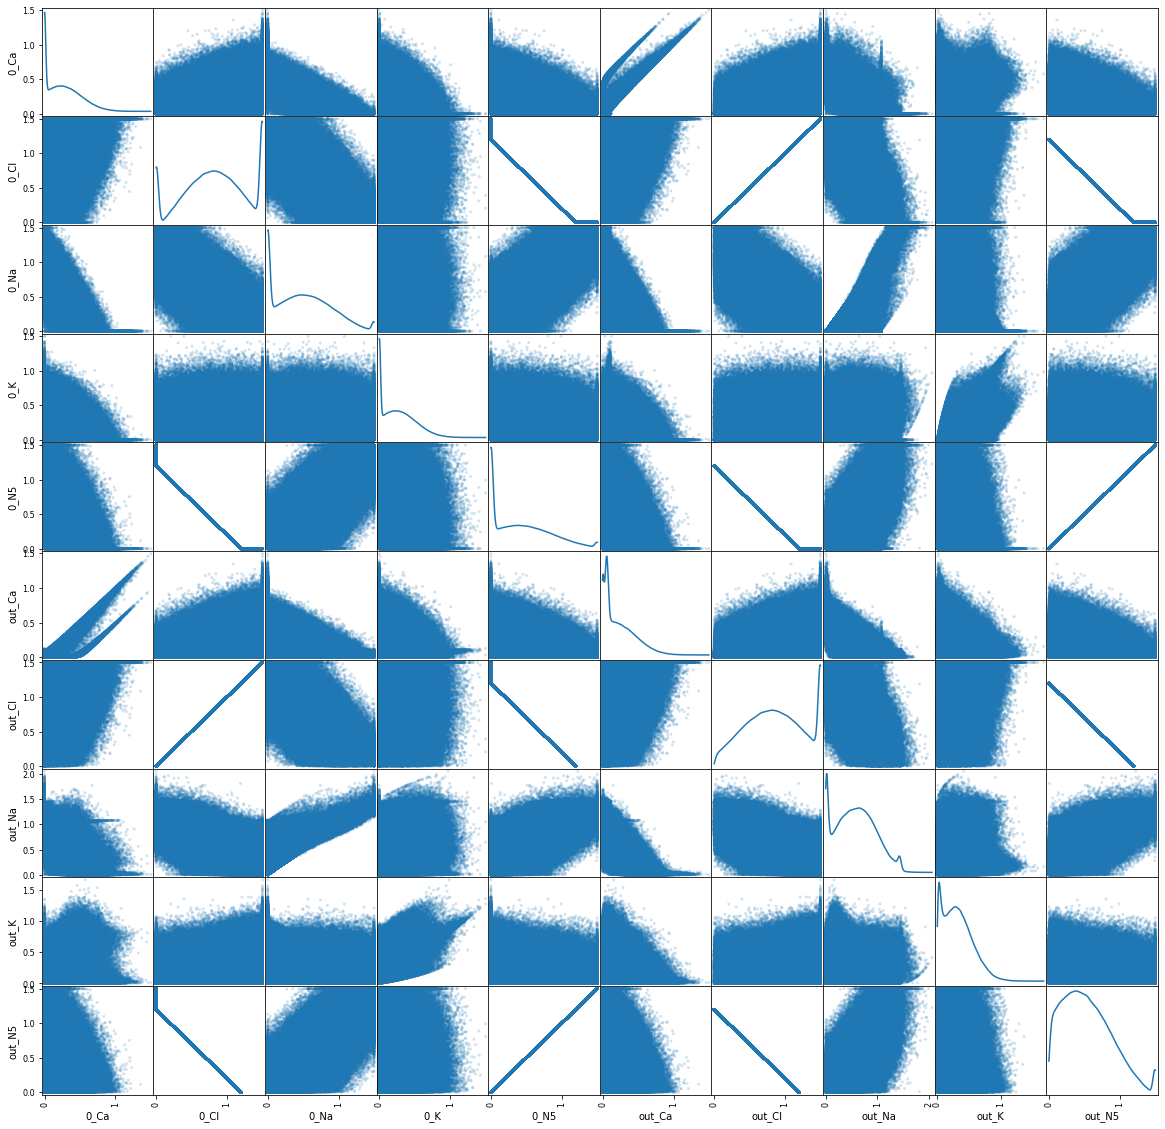

In [12]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[0,1,2,3,4,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));

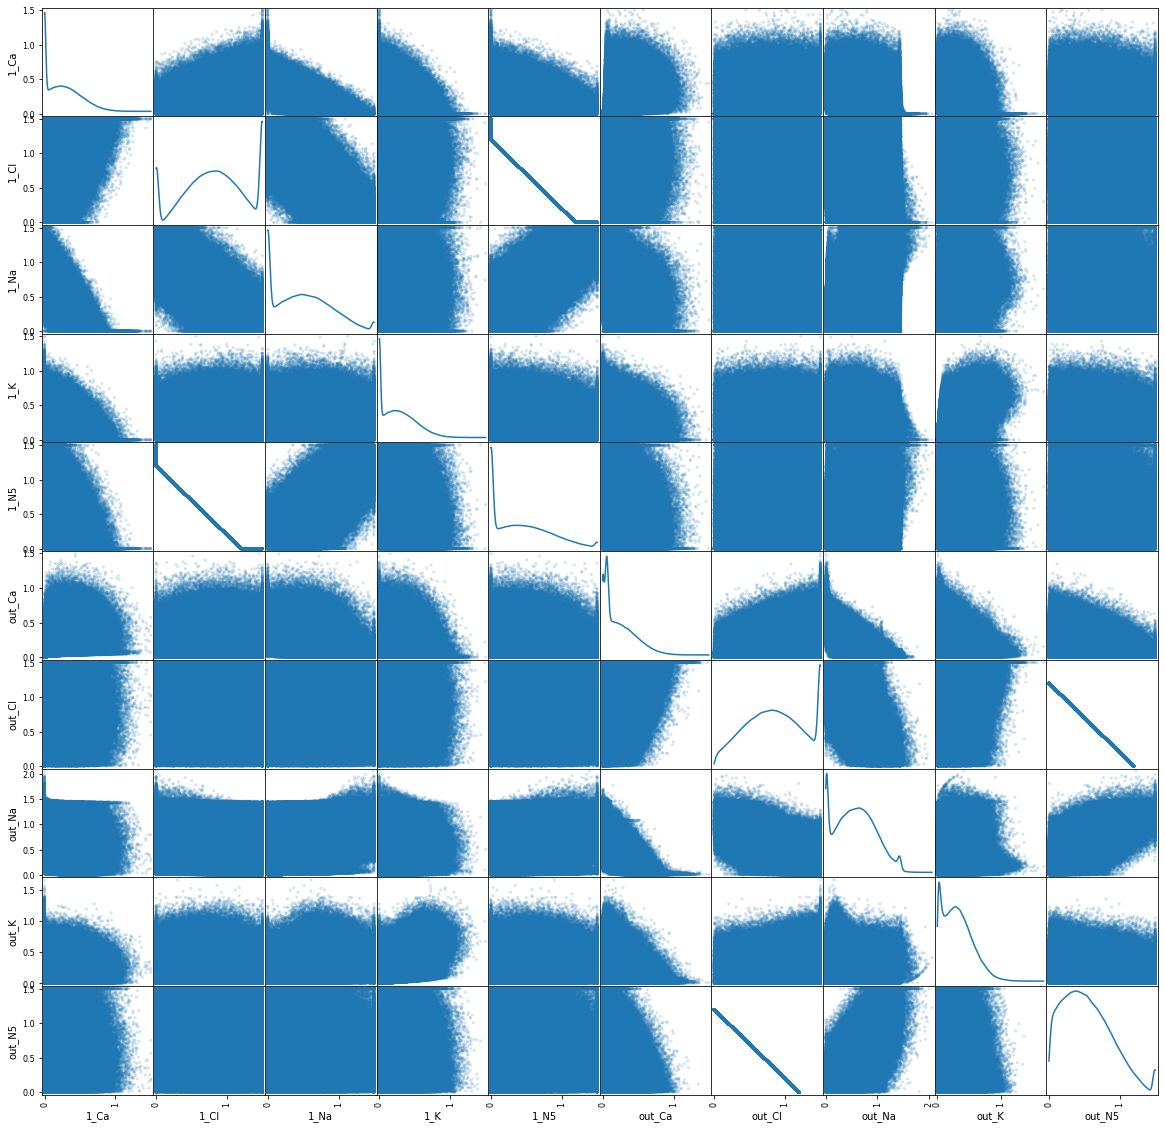

In [13]:
mpl.rcParams.update({'font.size': 10})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 
mpl.rc('axes', labelsize=10)

pd.plotting.scatter_matrix(df.iloc[:,[5,6,7,8,9,10,11,12,13,14]], 
                           alpha=0.2,
                           diagonal='kde',
                           figsize = (20,20));